In [1]:
os.chdir('/Users/kyle/Dropbox/PFH/iPFH/ModelInfo/')

In [2]:
import hddm

In [3]:
data=hddm.load_csv("all_sx_NEW.csv")


In [4]:
model=hddm.HDDM(data, depends_on={'v':['stim', 'cue'], 'z':'cue'}, 
	informative=False, bias=True, include=['st', 'sv', 'sz', 't', 'a', 'v', 'z'])
model.load_db("/Users/kyle/Dropbox/PFH/iPFH/ModelInfo/msm_traces.db", db='pickle')


In [5]:
from myhddm import vis

In [66]:
zall = vis.get_nodes(model, 'z')#_traces(model, project='img')
vf = vis.get_nodes(model, 'vf')
vh = vis.get_nodes(model, 'vh')

In [88]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.999):
      a = 1.0*np.array(data)
      n = len(a)
      m, se = np.mean(a), sem(a)
      h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
      return h

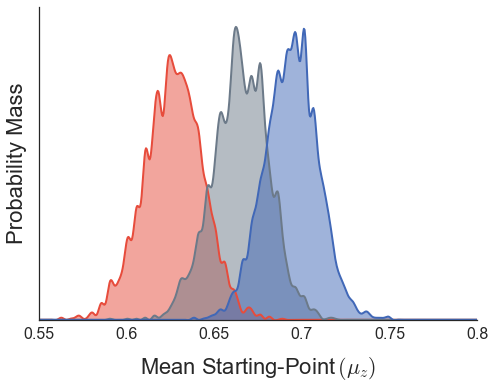

In [177]:
vis.plot_posterior_nodes(model, 'z', save=True)

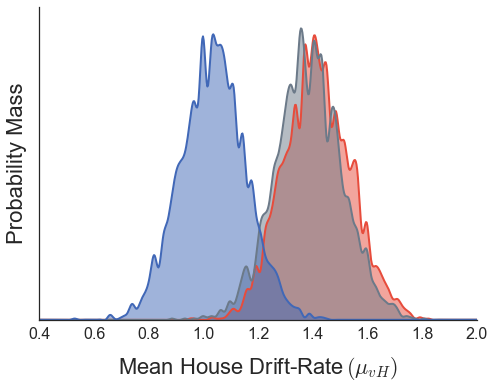

In [178]:
vis.plot_posterior_nodes(model, 'vh', save=True)

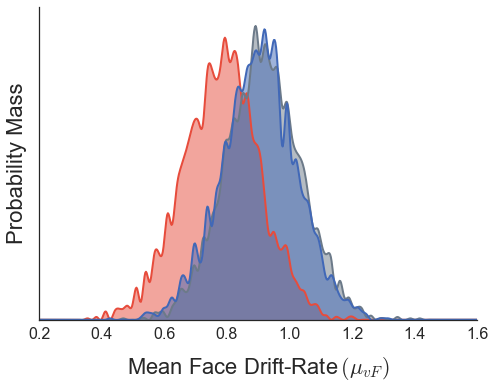

In [179]:
vis.plot_posterior_nodes(model, 'vf', save=True)

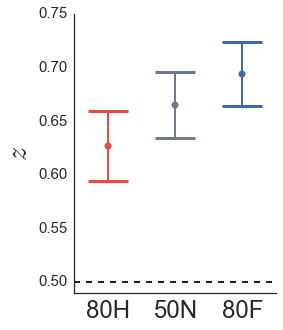

In [184]:

c=['#e74c3c','#6C7A89', '#4168B7']
y = [zall[i].trace() for i in range(len(zall))]
ymu = [np.mean(y[i]) for i in range(len(y))]
from scipy.stats import sem
ysem = [np.std(y[i])*1.96 for i in range(len(y))]


sns.set(style='white', font_scale=1.5)

f, ax = plt.subplots(1, figsize=(4,5))
for i in range(len(y)):
      plt.errorbar(x=np.arange(3)[i], y=ymu[i], yerr=ysem[i], marker='o', ms=7, ecolor=c[i], color=c[i], capsize=20, capthick=3, lw=0, elinewidth=2)

ax.set_xlim(-.5, 2.5)
ax.set_ylim(.49, .75)
ax.hlines(.5, -.5, 2.5, linestyle='--', color='k')
sns.despine()
ax.set_xticks([0,1,2])
ax.set_xticklabels(['80H', '50N', '80F'], fontsize=24)
ax.set_ylabel('$z$', fontsize=28)
f.savefig('startingpoint_mu95ci.png', dpi=600)

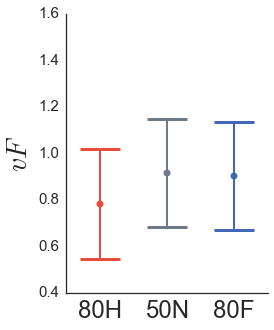

In [182]:
y = [vf[i].trace() for i in range(len(vf))]
ymu = [np.mean(y[i]) for i in range(len(y))]
ysem = [np.std(y[i])*1.96 for i in range(len(y))]

sns.set(style='white', font_scale=1.5)

f, ax = plt.subplots(1, figsize=(4,5))
for i in range(len(y)):
      plt.errorbar(x=np.arange(3)[i], y=ymu[i], yerr=ysem[i], marker='o', ms=7, ecolor=c[i], color=c[i], capsize=20, capthick=3, lw=0, elinewidth=2)

ax.set_xlim(-.5, 2.5)
ax.set_ylim(.4, 1.6)
#ax.hlines(.5, -.5, 2.5, linestyle='--', color='k')
sns.despine()
ax.set_xticks([0,1,2])
ax.set_xticklabels(['80H', '50N', '80F'], fontsize=24)
ax.set_ylabel('$vF$', fontsize=28)
f.savefig('face_drift_mu95ci.png', dpi=600)

In [78]:
from scipy.stats import ttest_rel as tt
tt(y[1], y[2])

Ttest_relResult(statistic=4.6357195331997483, pvalue=3.6704487718004419e-06)

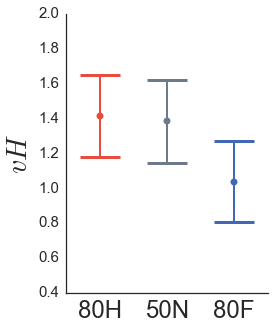

In [183]:
y = [np.abs(vh[i].trace()) for i in range(len(vh))]
ymu = [np.mean(y[i]) for i in range(len(y))]
ysem = [np.std(y[i])*1.96 for i in range(len(y))]

sns.set(style='white', font_scale=1.5)

f, ax = plt.subplots(1, figsize=(4,5))
for i in range(len(y)):
      plt.errorbar(x=np.arange(3)[i], y=ymu[i], yerr=ysem[i], marker='o', ms=7, ecolor=c[i], color=c[i], capsize=20, capthick=3, lw=0, elinewidth=2)

ax.set_xlim(-.5, 2.5)
ax.set_ylim(.4, 2.0)
#ax.hlines(.5, -.5, 2.5, linestyle='--', color='k')
sns.despine()
ax.set_xticks([0,1,2])
ax.set_xticklabels(['80H', '50N', '80F'], fontsize=24)
ax.set_ylabel('$vH$', fontsize=28)

f.savefig('house_drift_mu95ci.png', dpi=600)

In [26]:
print 'P(Valid Face Drift > Neutral Face Drift) = ', (vF['FN']>0).mean()
print 'P(Valid Face Drift > Invalid Face Drift) = ', (vF['FH']>0).mean()
print '\n'
print 'P(Valid House Drift > Neutral House Drift) = ', (vH['HN']>0).mean()
print 'P(Valid House Drift > Invalid House Drift) = ', (vH['HF']>0).mean()
print '\n'
print 'P(FaceCue Starting-Point > NeutralCue Starting-Point) = ', (z['FN']>0).mean()
print 'P(FaceCue Starting-Point > HouseCue Starting-Point) = ', (z['FH']>0).mean()
print '\n'
print 'P(Invalid House Drift < Neutral House Drift) = ', (vH['NF']>0).mean()
print 'P(Invalid House Drift < Valid House Drift) = ', (vH['HF']>0).mean()



P(Valid Face Drift > Neutral Face Drift) =  0.4805
P(Valid Face Drift > Invalid Face Drift) =  0.77125


P(Valid House Drift > Neutral House Drift) =  0.58275
P(Valid House Drift > Invalid House Drift) =  0.99175


P(FaceCue Starting-Point > NeutralCue Starting-Point) =  0.91925
P(FaceCue Starting-Point > HouseCue Starting-Point) =  0.998


P(Invalid House Drift < Neutral House Drift) =  0.982
P(Invalid House Drift < Valid House Drift) =  0.99175


In [82]:
print 'P(Valid Face Drift > Neutral Face Drift) = ', (vF['FN']>0).mean()
print 'P(Valid Face Drift > Invalid Face Drift) = ', (vF['FH']>0).mean()
print '\n'
print 'P(Valid House Drift > Neutral House Drift) = ', (vH['HN']>0).mean()
print 'P(Valid House Drift > Invalid House Drift) = ', (vH['HF']>0).mean()
print '\n'
print 'P(FaceCue Starting-Point > NeutralCue Starting-Point) = ', (z['FN']>0).mean()
print 'P(FaceCue Starting-Point > HouseCue Starting-Point) = ', (z['FH']>0).mean()
print '\n'
print 'P(Invalid House Drift < Neutral House Drift) = ', (vH['NF']>0).mean()
print 'P(Invalid House Drift < Valid House Drift) = ', (vH['HF']>0).mean()



P(Valid Face Drift > Neutral Face Drift) =  0.4805
P(Valid Face Drift > Invalid Face Drift) =  0.77125


P(Valid House Drift > Neutral House Drift) =  0.58275
P(Valid House Drift > Invalid House Drift) =  0.99175


P(FaceCue Starting-Point > NeutralCue Starting-Point) =  0.91925
P(FaceCue Starting-Point > HouseCue Starting-Point) =  0.998


P(Invalid House Drift < Neutral House Drift) =  0.982
P(Invalid House Drift < Valid House Drift) =  0.99175


In [9]:
vF.keys()

['NH', 'FH', 'FN']